# 单组柱状图

## 快速出图

柱状图（bar chart）是一种常用的图形工具，用于展示不同类别之间的数值对比。
它通过一组垂直或水平的矩形条来表示各类别的值，条的高度（或长度）对应数据的大小。
柱状图直观、清晰，适合用于比较组间的均值，尤其适用于离散类别数据的可视化。
在科研和数据分析中，柱状图常用于呈现实验组与对照组之间的差异。
`plotfig` 基于强大的 `matplotlib` 开发，简化了画图流程，使得多组数据的对比更加直观。

例如，我们有3组数据 （分别有9个样本、10个样本、11个样本）通过柱状图展示它们之间的差异。

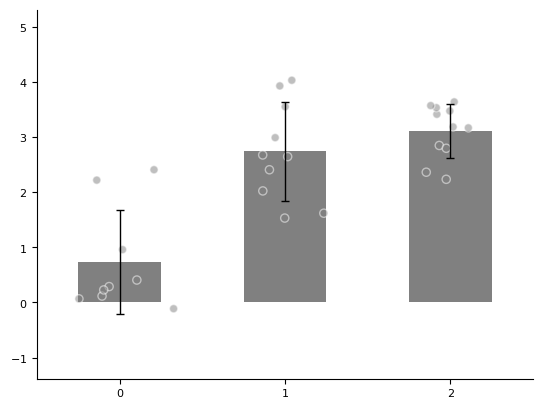

In [2]:
import numpy as np
from plotfig import *

data1 = np.random.normal(1, 1, 9)
data2 = np.random.normal(2, 1, 10)
data3 = np.random.normal(3, 1, 11)

ax = plot_one_group_bar_figure([data1, data2, data3])

## 多子图

借助 `matplotlib`，我们可以在外部预先创建 `figure` 和 `axes`，从而灵活绘制多个子图，实现更复杂的图形布局。
关于更高级的子图排版方式，详见[matplotlib中的教程](https://matplotlib.org/stable/users/explain/axes/mosaic.html)。

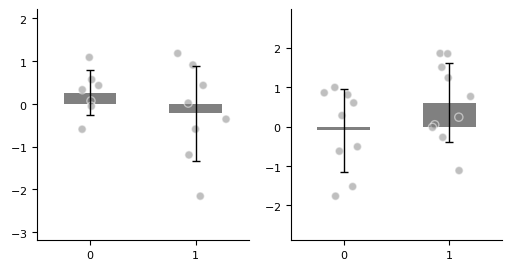

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

ax1_bar1 = np.random.normal(0, 1, 7)
ax1_bar2 = np.random.normal(0, 1, 8)
ax2_bar1 = np.random.normal(0, 1, 9)
ax2_bar2 = np.random.normal(0, 1, 10)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust()

ax1 = plot_one_group_bar_figure([ax1_bar1, ax1_bar2], ax=axes.flatten()[0])
ax2 = plot_one_group_bar_figure([ax2_bar1, ax2_bar2], ax=axes.flatten()[1])

更多 `axes` 。

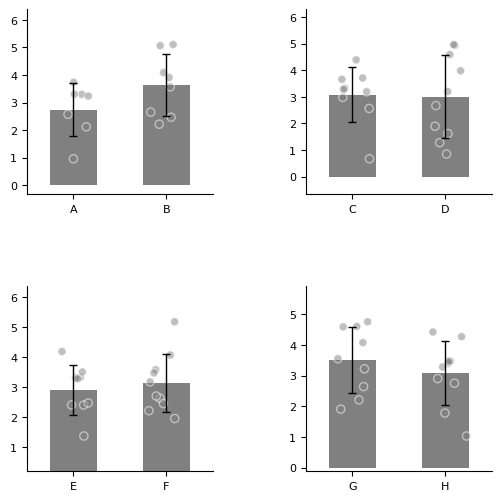

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

ax1_bar1 = np.random.normal(3, 1, 7)
ax1_bar2 = np.random.normal(3, 1, 8)
ax2_bar1 = np.random.normal(3, 1, 9)
ax2_bar2 = np.random.normal(3, 1, 10)
ax3_bar1 = np.random.normal(3, 1, 9)
ax3_bar2 = np.random.normal(3, 1, 10)
ax4_bar1 = np.random.normal(3, 1, 9)
ax4_bar2 = np.random.normal(3, 1, 10)


fig, axes = plt.subplots(2, 2, figsize=(6, 6))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax1 = plot_one_group_bar_figure([ax1_bar1, ax1_bar2], ax=axes[0,0], labels_name=["A", "B"])
ax2 = plot_one_group_bar_figure([ax2_bar1, ax2_bar2], ax=axes[0,1], labels_name=["C", "D"])
ax3 = plot_one_group_bar_figure([ax3_bar1, ax3_bar2], ax=axes[1,0], labels_name=["E", "F"])
ax4 = plot_one_group_bar_figure([ax4_bar1, ax4_bar2], ax=axes[1,1], labels_name=["G", "H"])

## 图的美化

### 参数设置

我们可以在外部创建 `fig` 对象，以便灵活控制图像大小。
`plotfig` 提供了丰富的选项用于自定义图形样式。
下面展示的是 `plot_one_group_bar_figure` 函数中部分常用参数的示例用法。

完整参数说明请参阅 [`plot_one_group_bar_figure`](../api/index.md/#plotfig.bar.plot_one_group_bar_figure) 的 API 文档。

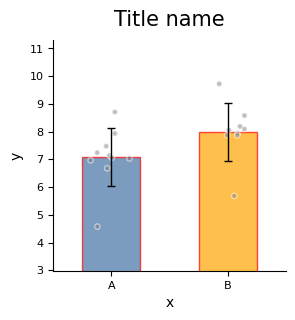

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

data1 = np.random.normal(7, 1, 10)
data2 = np.random.normal(8, 1, 9)

fig, ax = plt.subplots(figsize=(3, 3))
ax = plot_one_group_bar_figure(
    [data1, data2],
    ax=ax,
    labels_name=["A", "B"],
    x_label_name="x",
    y_label_name="y",
    title_name="Title name",
    title_fontsize=15,
    width=0.5,
    dots_size=15,
    colors=["#4573a5", "orange"],
    color_alpha=0.7,
    errorbar_type="sd",
    edgecolor="r",
)

`plot_one_group_bar_figure` 支持将柱状图绘制为渐变色样式，适用于展示不同对象之间的关联结果。

例如，当我们计算了“人-黑猩猩、人-猕猴、黑猩猩-猕猴”之间的同源脑区（共 20 个）结构连接的 Spearman 相关性时，可以考虑使用这种方式进行可视化展示。


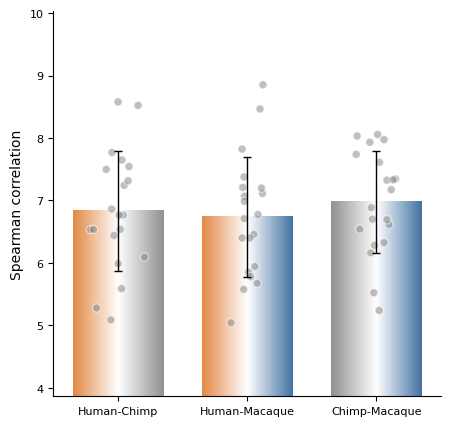

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *


human_color = "#e38a48"
chimp_color = "#919191"
macaque_color = "#4573a5"

np.random.seed(42)
human_chimp = np.random.normal(7, 1, 20)
human_macaque = np.random.normal(7, 1, 20)
chimp_macaque = np.random.normal(7, 1, 20)

fig, ax = plt.subplots(figsize=(5,5))
ax = plot_one_group_bar_figure(
    [human_chimp, human_macaque, chimp_macaque],
    ax=ax,
    labels_name=["Human-Chimp", "Human-Macaque", "Chimp-Macaque"],
    y_label_name="Spearman correlation",
    width=0.7,
    errorbar_type="sd",
    gradient_color=True,
    colors_start= [human_color, human_color, chimp_color],
    colors_end= [chimp_color, macaque_color, macaque_color]
)

### 关于x轴

当 x 轴标签较长时，可以通过旋转角度来避免重叠，提升可读性。

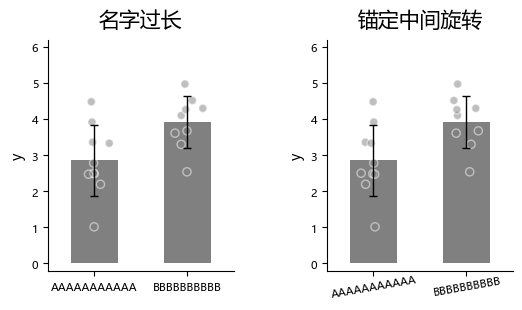

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

# 设置中文字体
plt.rcParams['font.family'] = "Microsoft YaHei"  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

data1 = np.random.normal(3, 1, 10)
data2 = np.random.normal(4, 1, 9)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.5)
ax1 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[0],
    labels_name=["AAAAAAAAAAA", "BBBBBBBBBB"],
    y_label_name="y",
    title_name="名字过长",
    title_fontsize=15,
)
ax2 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[1],
    labels_name=["AAAAAAAAAAA", "BBBBBBBBBB"],
    y_label_name="y",
    title_name="锚定中间旋转",
    title_fontsize=15,
    x_tick_rotation=10,
    x_label_ha="center",
)

### 关于y轴

`plot_one_group_bar_figure` 默认会自动计算最高点与最低点之间的距离，并将其设置为 y 轴长度的 0.618（即黄金比例），以优化视觉效果。
如果希望手动设置 y 轴范围，可以使用 `y_lim` 参数来自定义。

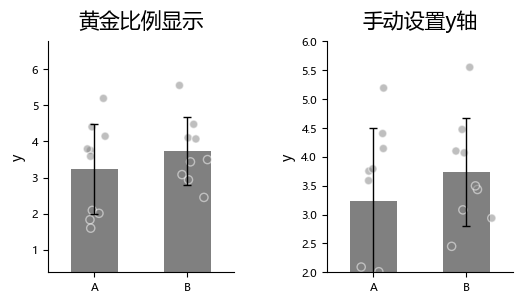

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

# 设置中文字体
plt.rcParams['font.family'] = "Microsoft YaHei"  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

data1 = np.random.normal(3, 1, 10)
data2 = np.random.normal(4, 1, 9)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.5)
ax1 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[0],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="黄金比例显示",
    title_fontsize=15,
)
ax2 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[1],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="手动设置y轴",
    title_fontsize=15,
    y_lim=(2, 6)  # 设置y轴范围
)

有时我们希望将 ax 的底端固定为 0，但不确定最大刻度的具体数值，可以使用 `ax_bottom_is_0` 来设置 ax 底端固定为0。

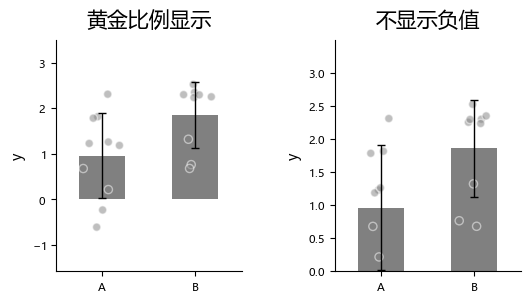

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

# 设置中文字体
plt.rcParams['font.family'] = "Microsoft YaHei"  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

data1 = np.random.normal(1,  1, 10)
data2 = np.random.normal(2, 1, 9)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.5)
ax1 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[0],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="黄金比例显示",
    title_fontsize=15,
)
ax2 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[1],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="不显示负值",
    title_fontsize=15,
    ax_bottom_is_0=True,  # 不显示负值
)

有时我们希望将 y 轴的刻度最大值限制为 1，例如当 y 轴表示经过 Fisher z 转换的相关系数时，可以设置`y_max_tick_to_one`来固定 y 轴的刻度最大值为1。

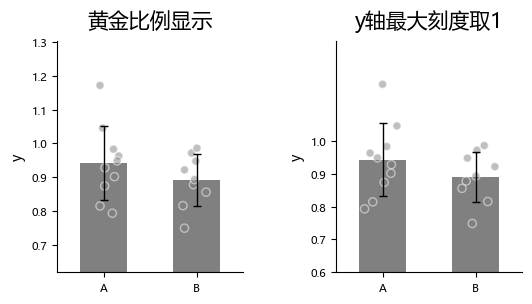

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

# 设置中文字体
plt.rcParams['font.family'] = "Microsoft YaHei"  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

data1 = np.random.normal(0.9,  0.1, 10)
data2 = np.random.normal(0.9, 0.1, 9)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.5)
ax1 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[0],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="黄金比例显示",
    title_fontsize=15,
)
ax2 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[1],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="y轴最大刻度取1",
    title_fontsize=15,
    y_max_tick_is_1=True,  # y轴最大刻度取1
)

有时我们可能希望更改 y 轴的显示格式，例如使用科学计数法来呈现数值，可以使用 `math_text` 参数来设置。

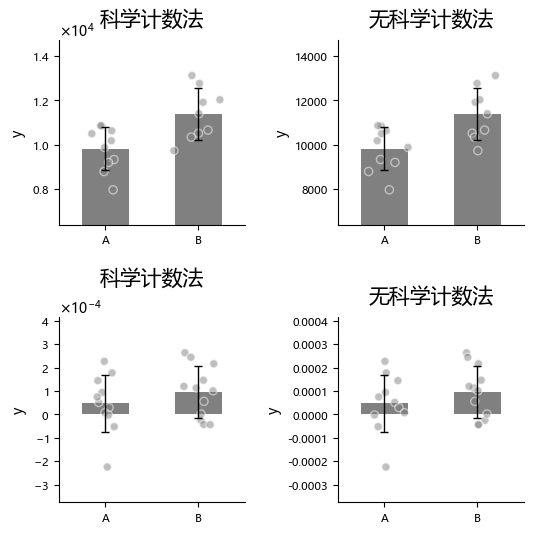

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

# 设置中文字体
plt.rcParams['font.family'] = "Microsoft YaHei"  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

data1 = np.random.normal(10000, 1000, 10)
data2 = np.random.normal(11000, 1000, 9)
data3 = np.random.normal(0.0001, 0.0001, 11)
data4 = np.random.normal(0.0001, 0.0001, 12)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax1 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[0,0],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="科学计数法",
    title_fontsize=15,
)  # 默认y轴使用科学计数法
ax2 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[0,1],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="无科学计数法",
    title_fontsize=15,
    math_text=False,  # 手动关闭科学计数法
)
ax3 = plot_one_group_bar_figure(
    [data3, data4],
    ax=axes[1,0],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="科学计数法",
    title_fontsize=15,
)  # 默认y轴使用科学计数法
ax4 = plot_one_group_bar_figure(
    [data3, data4],
    ax=axes[1,1],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="无科学计数法",
    title_fontsize=15,
    math_text=False,  # 手动关闭科学计数法
)

有时我们希望将 Y 轴显示为百分比格式。

!!! warning
    `percentage` 格式会与 `math_text` 冲突。
    而`math_text` 默认打开，需显式关闭。

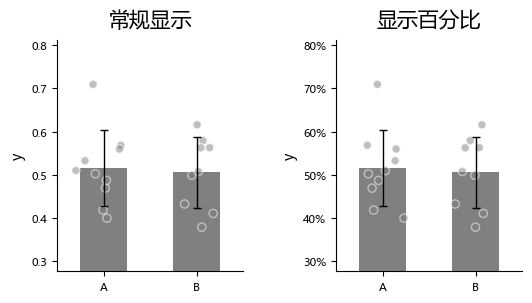

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

# 设置中文字体
plt.rcParams['font.family'] = "Microsoft YaHei"  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

data1 = np.random.normal(0.5,  0.1, 10)
data2 = np.random.normal(0.5, 0.1, 9)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.5)
ax1 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[0],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="常规显示",
    title_fontsize=15,
)
ax2 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[1],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="显示百分比",
    title_fontsize=15,
    math_text=False,
    percentage=True,
)

### 关于散点

`plot_one_group_bar_figure` 允许为每个散点分配颜色，常用于区分不同来源的数据。

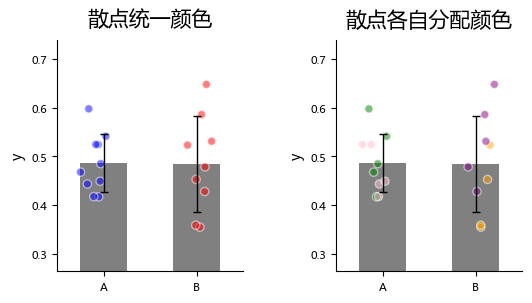

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

# 设置中文字体
plt.rcParams['font.family'] = "Microsoft YaHei"  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

data1 = np.random.normal(0.5,  0.1, 10)
data2 = np.random.normal(0.5, 0.1, 9)
dots_color1 = [["blue"]*10, ["red"]*9]
dots_color2 = [["green"]*5+["pink"]*5, ["orange"]*4+["purple"]*5]

fig, axes = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.5)
ax1 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[0],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="散点统一颜色",
    title_fontsize=15,
    dots_color=dots_color1,  # 散点颜色
)
ax2 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[1],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="散点各自分配颜色",
    title_fontsize=15,
    dots_color=dots_color2,  # 散点颜色
)

## 统计

`plot_one_group_bar_figure` 可快速实现柱间统计比较。当前支持以下统计方法：

1. 独立样本 t 检验（`ttest_ind`）
2. 配对样本 t 检验（`ttest_rel`）
3. 单样本t检验（`ttest_1samp`）
4. Mann-Whitney U 检验（`mannwhitneyu`）
5. 外部统计检验 （`external`）

使用时需先通过 `statistic` 选项启用统计功能，并在 `test_method` 中指定方法名。

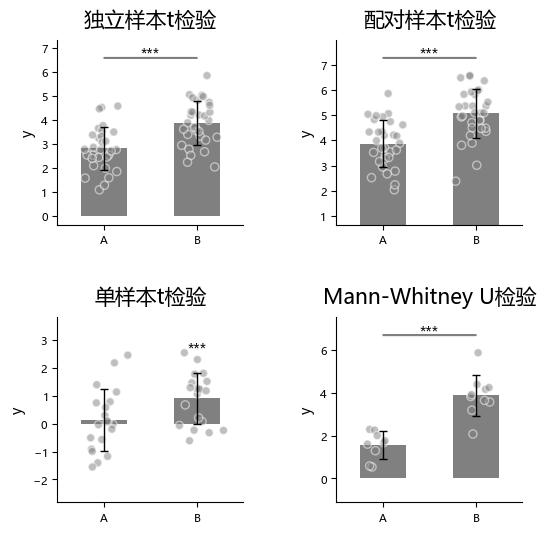

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

# 设置中文字体
plt.rcParams['font.family'] = "Microsoft YaHei"  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

np.random.seed(42)
data1 = np.random.normal(3, 1, 30)
data2 = np.random.normal(4, 1, 31)
data3 = np.random.normal(5, 1, 31)
data4 = np.random.normal(2, 1, 9)
data5 = np.random.normal(4, 1, 10)
data6 = np.random.normal(0, 1, 20)
data7 = np.random.normal(1, 1, 20)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
ax1 = plot_one_group_bar_figure(
    [data1, data2],
    ax=axes[0,0],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="独立样本t检验",
    title_fontsize=15,
    statistic=True, 
    test_method=["ttest_ind"]
)
ax2 = plot_one_group_bar_figure(
    [data2, data3],
    ax=axes[0,1],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="配对样本t检验",
    title_fontsize=15,
    statistic=True, 
    test_method=["ttest_rel"]
)
ax3 = plot_one_group_bar_figure(
    [data6, data7],
    ax=axes[1,0],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="单样本t检验",
    title_fontsize=15,
    statistic=True,
    test_method=["ttest_1samp"],
    popmean=0,
)
ax4 = plot_one_group_bar_figure(
    [data4, data5],
    ax=axes[1,1],
    labels_name=["A", "B"],
    y_label_name="y",
    title_name="Mann-Whitney U检验",
    title_fontsize=15,
    statistic=True, 
    test_method=["mannwhitneyu"]
)

“外部统计检验”（`external`）指用户可使用其他统计软件完成检验，只需将计算好的 p 值传入函数。
外部统计检验需通过 `p_list` 额外传入对应的 p 值列表。

!!! note
    当使用“外部统计检验”且有多个柱子需要比较时，传入的 *p* 值应遵循以下顺序：

    - 1 → 2、1 → 3、…、1 → n  
    - 2 → 3、2 → 4、…、2 → n  
    - 依此类推

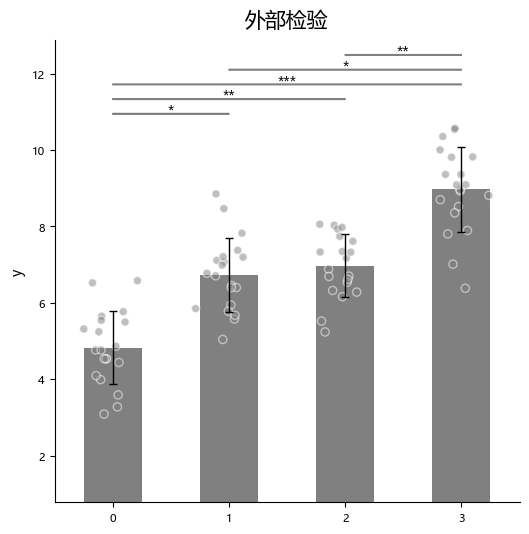

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *

# 设置中文字体
plt.rcParams['font.family'] = "Microsoft YaHei"  # 微软雅黑
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

np.random.seed(42)
data1 = np.random.normal(5,  1, 20)
data2 = np.random.normal(7, 1, 20)
data3 = np.random.normal(7, 1, 20)
data4 = np.random.normal(9, 1, 20)

p_list = [0.05, 0.01, 0.001, 1, 0.05, 0.01]

fig, ax = plt.subplots(figsize=(6, 6))
ax = plot_one_group_bar_figure(
    [data1, data2, data3, data4],
    ax=ax,
    y_label_name="y",
    title_name="外部检验",
    title_fontsize=15,
    statistic=True,
    test_method=["external"],
    p_list=p_list,
)

# 单组小提琴图

小提琴图（violin plot）是一种结合箱线图（box plot）和核密度估计图（density plot）特点的可视化工具，用于展示数据的分布情况。
它不仅显示数据的中位数、四分位数等统计信息，还通过对称的核密度曲线，直观反映数据在不同取值区间的分布形态。
相比传统箱线图，小提琴图能更全面揭示数据的多峰性、偏态等特征，适合比较多个组别的分布差异。
当数据分布不均匀，且采用非参数统计方法时，使用小琴图展示往往更为合适。

在 plotfig 中，绘制小提琴图的函数名为 `plot_one_group_violin_figure`。
其大部分参数与 `plot_one_group_bar_figure` 相似，以下是部分演示。

完整参数说明请参阅 [`plot_one_group_violin_figure`](../api/index.md/#plotfig.bar.plot_one_group_violin_figure) 的 API 文档。

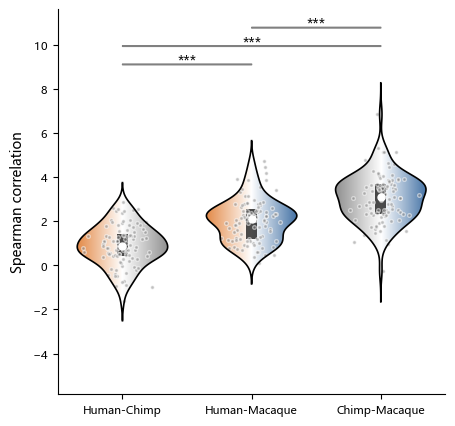

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from plotfig import *


human_color = "#e38a48"
chimp_color = "#919191"
macaque_color = "#4573a5"

np.random.seed(42)
human_chimp = 1 + np.random.normal(0, 1, 100)
human_macaque = 2 + np.random.normal(0, 1, 100)
chimp_macaque = 3 + np.random.normal(0, 1, 100)

fig, ax = plt.subplots(figsize=(5,5))
ax = plot_one_group_violin_figure(
    [human_chimp, human_macaque, chimp_macaque],
    ax=ax,
    labels_name=["Human-Chimp", "Human-Macaque", "Chimp-Macaque"],
    y_label_name="Spearman correlation",
    width=0.7,
    gradient_color=True,
    colors_start= [human_color, human_color, chimp_color],
    colors_end= [chimp_color, macaque_color, macaque_color],
    show_dots=True,
    dots_size=7,
    statistic=True,
    test_method=["mannwhitneyu"]
)